# Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Hypothesis

$$h_{\theta}(x) =  \theta_{0}x_{0} + \theta_{1}x_{1} + \ldots + \theta_{n}x_{n} = \theta^Tx = \begin{bmatrix}\theta_{0}&\theta_{1}&\ldots&\theta_{n}\end{bmatrix}  \begin{bmatrix}x_{0}\\x_{1}\\\vdots\\x_{n}\end{bmatrix}  \\  \text{where } x_{0} = 1$$

## Logistic (Sigmoid) Function

$$g(z) = \frac{1}{1 + e^{(-z)}} \\[0.7cm]
h_{\theta}(x) = g(\theta^Tx) \\[0.7cm]
z = \theta^Tx$$

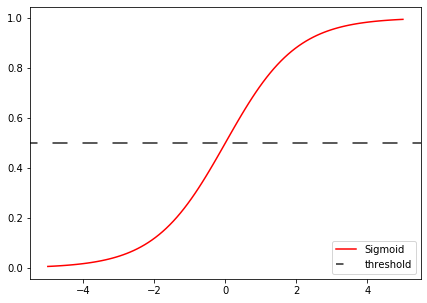

In [2]:
sigmoid = lambda x: 1 / (1 + np.exp(-x))

fig, ax = plt.subplots(figsize=(7,5))

x = np.linspace(-5,5,100)
ax.plot(x, sigmoid(x), c='r', label='Sigmoid')
ax.axhline(y=0.5, linestyle=(5, (10,10)), c='k', alpha=0.85, label='threshold')
ax.legend(loc='lower right')

## Cost Function

### Comes from Maximum Likelihood Estimation (MLE) - negative of log-likelihood function

<br> <br> 

$$J(\theta) = \frac{1}{m}\sum_{i=1}^{m} Cost(h_{\theta}(x^{(i)}), y^{(i)}) \\[0.7cm]
J(\theta) = -\frac{1}{m} \left [ \sum_{i=1}^{m} y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - h_{\theta}(x^{(i)}))\right ] \\[0.7cm]$$

Can be reformulated as: 

$$ \text{Cost}(h_{\theta}(x), y) = 
\begin{cases} 
      -log(h_{\theta}(x)) & \text{if } y = 1 \\
      -log(1 - h_{\theta}(x)) & \text{if } y = 0 
   \end{cases}
$$


In [3]:
from matplotlib import rc
rc('text', usetex=True)
plt.rc('axes', titlesize=20)   
plt.rc('axes', labelsize=18)
plt.rc('legend', fontsize=14) 

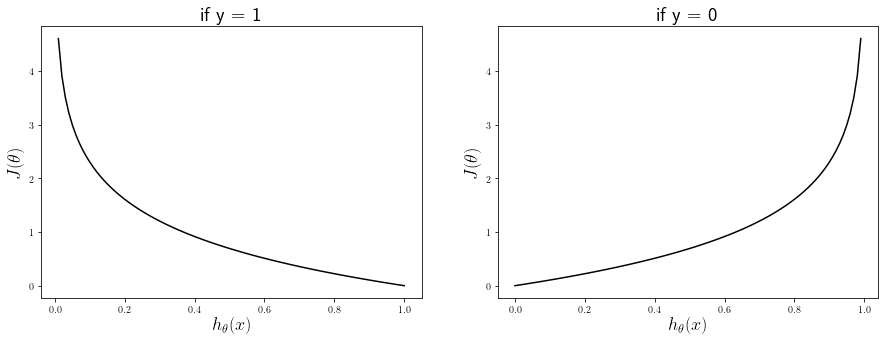

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

for i, ax in enumerate(axes.flatten()):
    if i == 0:
        ax.set_title('if y = 1')
        x = np.linspace(0.01, 1, 100)
        ax.plot(x, -np.log(x), c='k')
        ax.set(xlabel=r'$h_{\theta}(x)$', ylabel=r'$J(\theta)$')
    else:
        ax.set_title('if y = 0')
        x = np.linspace(0, 0.99, 100)
        ax.plot(x, -np.log(1-x), c='k')
        ax.set(xlabel=r'$h_{\theta}(x)$', ylabel=r'$J(\theta)$')

## Optimization - Gradient Descent

$$\theta_{j} := \theta_{j} - \alpha\frac{\partial}{\partial\theta_{j}}J(\theta)$$

$$\theta_{j} := \theta_{j} - \alpha \sum_{i=1}^{m}((h_{\theta}(x^{(i)}) - y^{(i)})x_j)$$

$$\theta_{j} := \theta_{j} - \frac{\alpha}{m} X^{T} \left (g(X\theta \right ) - y)$$

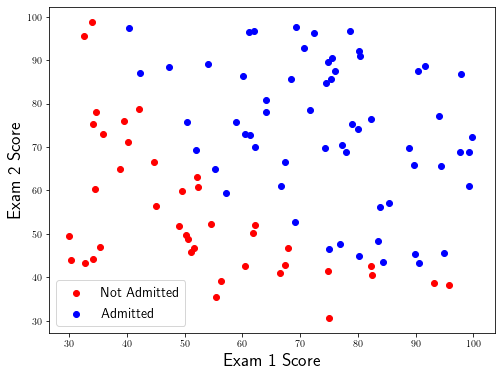

In [6]:
import pandas as pd
from matplotlib.colors import ListedColormap

cmap1 = ListedColormap(['r', 'b'])

data = pd.read_csv('data/lr-data1.txt', sep=',', header=None)

na = data[data.iloc[:,2]==0]
a = data[data.iloc[:,2]==1]

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(na.iloc[:,0], na.iloc[:,1], c='r', label='Not Admitted')
ax.scatter(a.iloc[:,0], a.iloc[:,1], c='b', label='Admitted')
ax.set(xlabel='Exam 1 Score', ylabel='Exam 2 Score')
ax.legend()

In [7]:
X = data.iloc[:,:2]
y = data.iloc[:,2]

In [8]:
class LogisticRegression:
    def __init__(self, alpha=0.01, max_iter=1000000, random_state=42):
            self.alpha = alpha
            self.max_iter = max_iter
            self.random_state = random_state

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def _loss(self, y, h):
        h = np.clip(h, 1e-10, 1-1e-10) # h must be in (0,1) to compute log loss
        return np.sum((-y*np.log(h) - (1-y)*np.log(1-h)))/y.shape[0]
    
    def fit(self, X, y):
        x_0 = np.ones((X.shape[0], 1)) # intercept
        X_ = np.c_[x_0, X]
        # random initialization of weights
        rng = np.random.RandomState(self.random_state)
        self.theta = rng.randn(X_.shape[1],1)
        y = y[:, np.newaxis]

        for i in range(self.max_iter):
            z = X_.dot(self.theta)
            h = self._sigmoid(z)
            gradients = X_.T.dot(h-y)/y.shape[0]
            self.theta = self.theta - self.alpha*gradients         
    
    def predict_proba(self, X):
        X_ = np.c_[np.ones((X.shape[0], 1)), X]
        z = X_.dot(self.theta)
        return self._sigmoid(z)
    
    def predict(self, X):
        prob = self.predict_proba(X)
        return np.where(prob > 0.5, 1, 0)
    
    def score(self, X, y):
        pred = self.predict(X)
        y = y.values.reshape(-1,1)
        return (pred == y).sum()/y.shape[0]

In [9]:
model = LogisticRegression(alpha=0.1, max_iter=1000000)
model.fit(X,y)
acc = model.score(X,y)
print("Model Accuracy: {}".format(acc))

Model Accuracy: 0.92


## Visualizing Decision Boundary

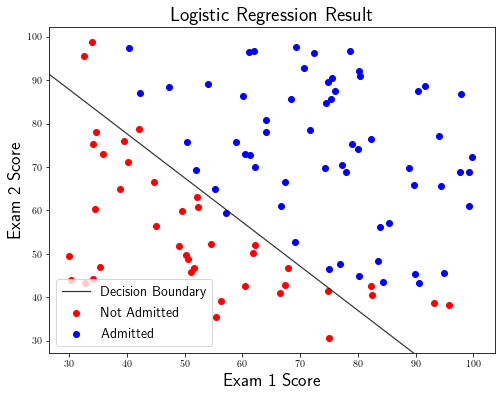

In [10]:
theta = model.theta
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(na.iloc[:,0], na.iloc[:,1], c='r', label='Not Admitted')
ax.scatter(a.iloc[:,0], a.iloc[:,1], c='b', label='Admitted')
ax.set(xlabel='Exam 1 Score', ylabel='Exam 2 Score', title='Logistic Regression Result')
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
x = np.arange(xmin-1, xmax+1, 0.01)
y = -((theta[1]/theta[2])*x + (theta[0]/theta[2]))
ax.plot(x, y, c='k', linewidth=1.2, alpha=0.8, label='Decision Boundary')
ax.axis([xmin, xmax, ymin, ymax])
ax.legend()